## Import libraries

In [0]:
import numpy as np
import matplotlib.pyplot as plt 

# this is an update okay then

import pandas as pd  

# Imports from the scikit-learn package
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics 

%matplotlib inline

### Read in the `student_scores.csv` file

In [0]:
sc._jsc.hadoopConfiguration().set("fs.s3n.awsAccessKeyId", "<aws_s3_key_id>")
sc._jsc.hadoopConfiguration().set("fs.s3n.awsSecretAccessKey", "<aws_s3_access_key>")

In [0]:
sdf = spark.read.csv("s3a://<aws_s3_url>/student_scores.csv", header=True, inferSchema=True)

In [0]:
df = sdf.toPandas()

Examine at the structure of the dataframe and summary statistics

In [0]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [0]:
df.count()

Out[20]: Hours 25
Scores 25
dtype: int64

In [0]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


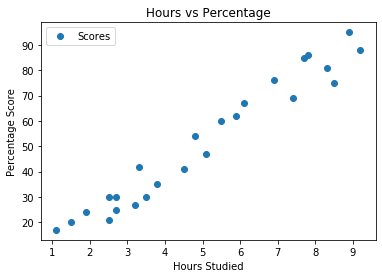

In [0]:
df.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()  

Split the dataset into training and test

In [0]:
X_train, X_test, y_train, y_test = train_test_split(df[['Hours']], df[['Scores']], test_size=0.2, random_state=42)

Check out the values for:
`X_train`, `X_test`, `y_train`, `y_test`

## Train (fit) our model

In [0]:
model = LinearRegression()  
model.fit(X_train, y_train)

Out[29]: LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Our formula for the regression line again is:

Y = β₀ + Xβ₁ + ε

β₀ is `model.intercept_`

In [0]:
print(model.intercept_)

[2.82689235]

β₁ is `model.coef_` (the slope / coefficient of X)

In [0]:
print(model.coef_)

[[9.68207815]]

We have now learnt a model we can express as a formula.

How much variance is explained by our model? What is the r^2 score?

In [0]:
model.score(X_train, y_train)

Out[33]: 0.9491209376364417

## Predict unseen values with our fitted model

Our X_test, which is 20% of our dataset, was held out during training. We can use this for prediction and to determine the accuracy of our predictions.

In [0]:
y_pred = model.predict(X_test)

In [0]:
y_pred

Out[35]: array([[83.18814104],
 [27.03208774],
 [27.03208774],
 [69.63323162],
 [59.95115347]])

In [0]:
results = pd.DataFrame({'Actual': y_test.Scores, 'Predicted': y_pred.flatten()})  
results

,Actual,Predicted
8,81,83.188141
16,30,27.032088
0,21,27.032088
23,76,69.633232
11,62,59.951153


In [0]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))  


Mean Absolute Error: 3.9207511902099244
Mean Squared Error: 18.943211722315272
Root Mean Squared Error: 4.352380006653288